# Week embedding matrix

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../../src/")
from collections import OrderedDict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils
import data

from models import week_embedding
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split

In [13]:
adl = data.ActualDataLoader("../../data")
index, wili = adl.get()

In [93]:
X = (index["epiweek"] % 100).values
y = wili

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Embedding model

In [132]:
model = week_embedding(1)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1, 1)              54        
_________________________________________________________________
flatten_7 (Flatten)          (None, 1)                 0         
_________________________________________________________________
activation_25 (Activation)   (None, 1)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 30)                60        
_________________________________________________________________
activation_26 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 20)                620       
_________________________________________________________________
activation_27 (Activation)   (None, 20)                0         
__________

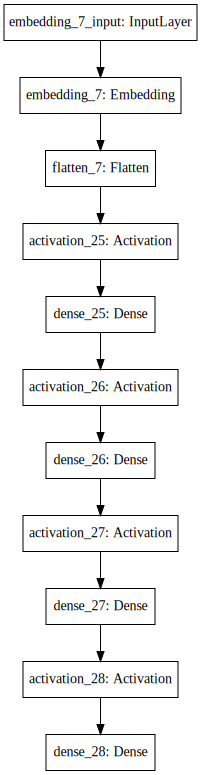

In [133]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [134]:
model.compile(optimizer="adam", loss="mse")

In [135]:
history = model.fit(X_train, y_train,
                    batch_size=16, epochs=7,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 8228 samples, validate on 2057 samples
Epoch 1/7
8228/8228 [==============================] - 0s - loss: 2.5358 - val_loss: 2.2850
Epoch 2/7
8228/8228 [==============================] - 0s - loss: 2.1664 - val_loss: 2.2844
Epoch 3/7
8228/8228 [==============================] - 0s - loss: 2.1614 - val_loss: 2.2821
Epoch 4/7
8228/8228 [==============================] - 0s - loss: 2.1625 - val_loss: 2.3046
Epoch 5/7
8228/8228 [==============================] - 0s - loss: 2.1630 - val_loss: 2.2775
Epoch 6/7
8228/8228 [==============================] - 0s - loss: 2.1625 - val_loss: 2.2768
Epoch 7/7
8228/8228 [==============================] - 0s - loss: 2.1659 - val_loss: 2.2971


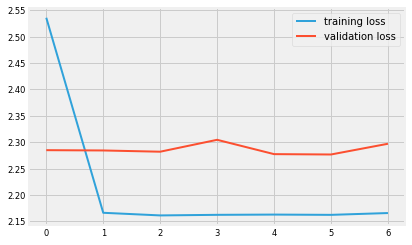

In [136]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()

In [137]:
model.evaluate(X_test, y_test)

  32/2057 [..............................] - ETA: 0s

2.2971455152022009

In [115]:
emb = model.layers[0].weights[0].get_value()

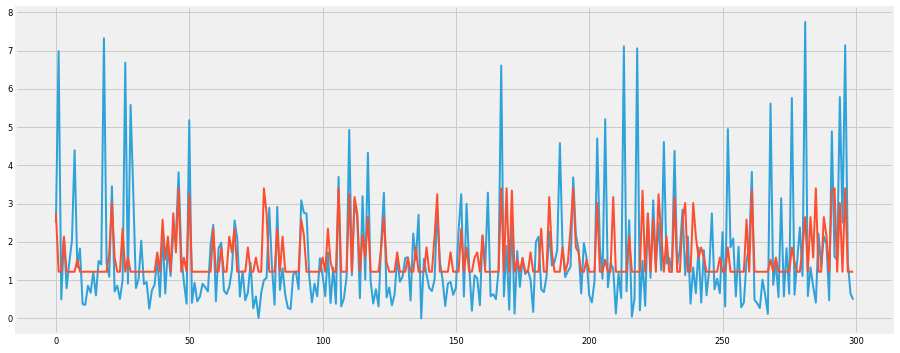

In [116]:
plt.figure(figsize=(14, 6))
plt.plot(y_train[:300])
plt.plot(model.predict(X_train)[:300])

## Save embeddings

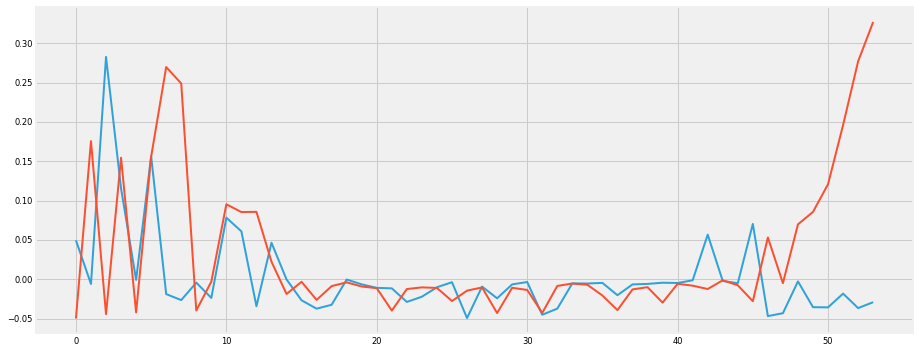

In [118]:
plt.figure(figsize=(14, 6))
for i in range(emb.shape[1]):
    plt.plot(emb[:, i])

In [121]:
from keras.utils.np_utils import to_categorical

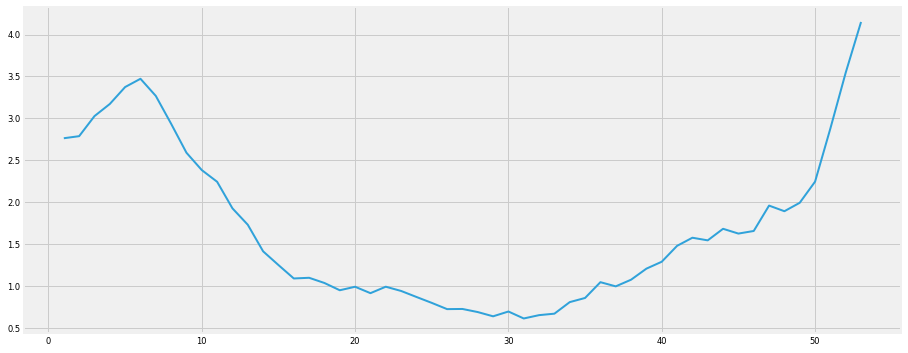

In [131]:
plt.figure(figsize=(14, 6))
plt.plot(to_categorical(X_train).T.dot(y_train) / to_categorical(X_train).sum(axis=0))

In [14]:
np.save("../../data/processed/week_embeddings", emb)